In [ ]:


from google.colab import drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
# import sklearn

# # Check library versions
# print("Python version:", sys.version)
# print("TensorFlow version:", tf.__version__)
# print("NumPy version:", np.__version__)
# print("Pandas version:", pd.__version__)
# print("Scikit-learn version:", sklearn.__version__)

In [ ]:
# Ensure reproducibility
# Ensure reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # ensures deterministic GPU ops (for TF >= 2.1)



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the dataset
#df = pd.read_csv('/content/drive/MyDrive/Datasets/AID_1239/AID1239_extracted_descriptor_data.csv')
#/content/drive/MyDrive/Datasets/AID_1239/concatenated_AID_1239_Active_Inactive.csv
df = pd.read_csv('/content/drive/MyDrive/Datasets/AID_1239/concatenated_AID_1239_Active_Inactive.csv')
df_copy = df.copy()


In [ ]:
df.shape

(4000, 24283)

In [ ]:
# Encode target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['PUBCHEM_ACTIVITY_OUTCOME'])  # Active=0, Inactive=1 or vice versa

# Optional: ensure index column is correct
df = df.reset_index()

In [ ]:
df.head()

,index,Unnamed: 0,PUBCHEM_CID,PUBCHEM_SID,SMILES,PUBCHEM_ACTIVITY_OUTCOME,SMILES.1,MOLECULEID,autocorr2d0,autocorr2d1,...,morgan_counts_2802687793,morgan_counts_195354433,morgan_counts_2136746831,morgan_counts_3247732579,morgan_counts_1311119203,morgan_counts_2736239461,morgan_counts_2622473065,morgan_counts_944103350,morgan_counts_1954163650,label
0,0,0,1449342,24817956,C1=CC=C(C=C1)C(=O)NC2=NC=C(C=C2)NC(=O)C3=CC=CS3,Active,O=C(NC1=CN=C(NC(=O)C2=CC=CC=C2)C=C1)C1=CC=CS1,M3503957,3.470,3.799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,1,3242114,4247974,C1COCCN1C(=O)C2=NOC(=C2)C3=CC=C(C=C3)Cl,Active,ClC1=CC=C(C=C1)C1=CC(=NO1)C(=O)N1CCOCC1,M2730310,3.353,3.709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,2,9594900,17507393,CC1=CC(=NC2=CC=CC=C12)N/N=C/C3=CC(=CC=C3)Br,Active,CC1=CC(N\N=C\C2=CC(Br)=CC=C2)=NC2=CC=CC=C12,M3349978,3.462,3.850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,3,823601,7975245,CC1=C(C=CO1)C(=O)NC2=CC3=CC=CC=C3C=C2,Active,CC1=C(C=CO1)C(=O)NC1=CC2=CC=CC=C2C=C1,M2603287,3.196,3.537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,4,3239831,4245352,C1=CC=C(C(=C1)NC(=O)C2=CC=C(C=C2)Cl)O,Active,OC1=CC=CC=C1NC(=O)C1=CC=C(Cl)C=C1,M1281287,3.128,3.483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Image folder path
img_folder = '/content/drive/MyDrive/Datasets/AID_1239/molecule_images'
img_size = (128, 128)  # You can change this # check this

# Load all images into memory
X_images = []
y_labels = []

for i in range(len(df)):
    img_path = os.path.join(img_folder, f'molecule_{i}.png')
    if os.path.exists(img_path):
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        X_images.append(img_array)
        y_labels.append(df.loc[i, 'label'])

X = np.array(X_images)
y = np.array(y_labels)

print("Image dataset shape:", X.shape)
print("Labels shape:", y.shape)


Image dataset shape: (4000, 128, 128, 3)
Labels shape: (4000,)


In [ ]:
import numpy as np

# Save to .npy files
np.save('/content/drive/MyDrive/Datasets/AID_1239/X_images.npy', X)
np.save('/content/drive/MyDrive/Datasets/AID_1239/y_labels.npy', y)


In [ ]:
# starting point here

#import numpy as np

# Paths to saved files
X_path = '/content/drive/MyDrive/Datasets/AID_1239/X_images.npy'
y_path = '/content/drive/MyDrive/Datasets/AID_1239/y_labels.npy'

# Load data
X = np.load(X_path)
y = np.load(y_path)

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (4000, 128, 128, 3)
y shape: (4000,)


In [ ]:
# #Next starting point: Load it later

# data = np.load('/content/drive/MyDrive/Datasets/AID_1239/molecule_data.npz')
# X = data['X']
# y = data['y']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# # Step 4: Build and Train CNN

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
#     MaxPooling2D(2, 2),
#     Dropout(0.3),

#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Dropout(0.3),

#     Flatten(),
#     Dense(64, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Binary classification
# ])

# model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# # Train
# early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=50, batch_size=32, callbacks=[early_stopping])


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D,Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Define model
model = Sequential()

# 1st Conv Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Conv Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Conv Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#  Flatten
model.add(Flatten())

# MLP Part (Dense layers)
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,524,225 (32.52 MB)

 Trainable params: 8,523,777 (32.52 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# # Train
early_stopping = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.10,
                    epochs=50, batch_size=32, callbacks=[early_stopping])


Epoch 1/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.5408 - loss: 1.7139 - val_accuracy: 0.4844 - val_loss: 1.5459
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5872 - loss: 1.4368 - val_accuracy: 0.4844 - val_loss: 1.4824
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6332 - loss: 1.3326 - val_accuracy: 0.4812 - val_loss: 1.4179
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6515 - loss: 1.2765 - val_accuracy: 0.4875 - val_loss: 1.3293
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7278 - loss: 1.1820 - val_accuracy: 0.5656 - val_loss: 1.2560
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7687 - loss: 1.0900 - val_accuracy: 0.5469 - val_loss: 1.2439
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8233 - loss: 0.9685 - val_accuracy: 0.5562 - val_loss: 1.2480
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8807 - loss: 0.8512 - val_accuracy: 0.6187 - 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[307 115]
 [ 92 286]]
              precision    recall  f1-score   support

      Active       0.77      0.73      0.75       422
    Inactive       0.71      0.76      0.73       378

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)


np.float64(0.8046653627222347)

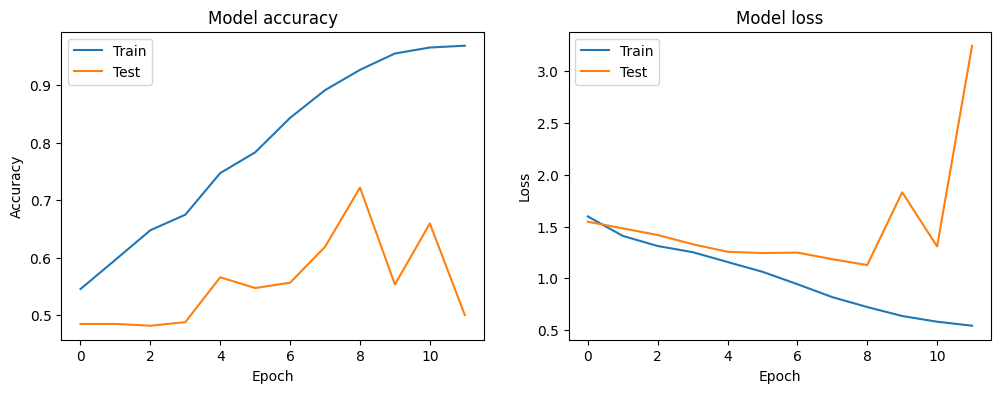

In [ ]:
#  train and test plot

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


# Optuna

In [ ]:
!pip install --quiet optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 25.6 MB/s eta 0:00:00


In [ ]:
import os, numpy as np, optuna, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, f1_score,
                             cohen_kappa_score, precision_score, recall_score)

# --- Reproducibility (optional but helpful) ---
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)

# --- Load data ---
X = np.load('/content/drive/MyDrive/Datasets/AID_1239/X_images.npy')
y = np.load('/content/drive/MyDrive/Datasets/AID_1239/y_labels.npy')

# --- 1) Hold out TEST once (unseen by Optuna) ---
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=SEED
)

# --- 2) From TRAIN_FULL, create TRAIN / VAL for Optuna ---
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.20, stratify=y_train_full, random_state=SEED
)

def build_model(dense_units, l2_reg, dropout_rate, lr):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
        BatchNormalization(), MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(), MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(), MaxPooling2D(2,2),

        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(dense_units // 2, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 3) Optuna objective: tune on TRAIN, score on VAL (no test leakage) ---
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True),
        "dropout_rate":  trial.suggest_float("dropout_rate", 0.2, 0.5),
        "l2":            trial.suggest_float("l2", 1e-5, 1e-2, log=True),
        "dense_units":   trial.suggest_int("dense_units", 64, 512, step=64),
        "batch_size":    trial.suggest_categorical("batch_size", [32, 64, 128]),
    }

    model = build_model(params["dense_units"], params["l2"], params["dropout_rate"], params["learning_rate"])
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=30, batch_size=params["batch_size"],
              callbacks=[es], verbose=0)

    y_val_prob = model.predict(X_val, verbose=0).ravel()
    return roc_auc_score(y_val, y_val_prob)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best AUC (val):", study.best_value)
print("Best Params:", study.best_params)

# --- 4) Retrain final model on TRAIN_FULL (train+val), eval once on TEST ---
best = study.best_params
final_model = build_model(best["dense_units"], best["l2"], best["dropout_rate"], best["learning_rate"])

es_final = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
final_model.fit(X_train_full, y_train_full,
                validation_split=0.10,  # internal val for early stopping (not test)
                epochs=30, batch_size=best["batch_size"],
                callbacks=[es_final], verbose=1)

# --- 5) Unified metrics on true TEST ---
y_test_prob = final_model.predict(X_test, verbose=0).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

y_tr_prob = final_model.predict(X_train_full, verbose=0).ravel()
y_tr_pred = (y_tr_prob > 0.5).astype(int)

results = {
    "Train Accuracy": accuracy_score(y_train_full, y_tr_pred),
    "Test Accuracy":  accuracy_score(y_test, y_test_pred),
    "ROC-AUC":        roc_auc_score(y_test, y_test_prob),
    "F1-Score":       f1_score(y_test, y_test_pred),
    "Cohen's Kappa":  cohen_kappa_score(y_test, y_test_pred),
    "Precision":      precision_score(y_test, y_test_pred),
    "Recall":         recall_score(y_test, y_test_pred),
}
print("\n📊 Final Evaluation (True Test Set)")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


[I 2025-08-20 07:37:28,952] A new study created in memory with name: no-name-4fb8bbc5-a883-4060-b577-43f5d8cebad3
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-08-20 07:37:56,860] Trial 0 finished with value: 0.742890625 and parameters: {'learning_rate': 1.3049210941449936e-05, 'dropout_rate': 0.2076213368513431, 'l2': 0.0009002709833563103, 'dense_units': 256, 'batch_size': 32}. Best is trial 0 with value: 0.742890625.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model inste

Best AUC (val): 0.8123144531250002
Best Params: {'learning_rate': 4.9383045319880394e-05, 'dropout_rate': 0.4429693100514035, 'l2': 0.0007490545126978975, 'dense_units': 256, 'batch_size': 32}
Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.5220 - loss: 1.6057 - val_accuracy: 0.4688 - val_loss: 1.2878
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5733 - loss: 1.1981 - val_accuracy: 0.4688 - val_loss: 1.4105
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5890 - loss: 1.1714 - val_accuracy: 0.4688 - val_loss: 1.3444
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6257 - loss: 1.1363 - val_accuracy: 0.4906 - val_loss: 1.1819
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6438 - loss: 1.1030 - val_accuracy: 0.5969 - val_loss: 1.1473
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6276 - loss: 1.0942 - val_accuracy: 0.5938 - val_loss: 1.1372
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms

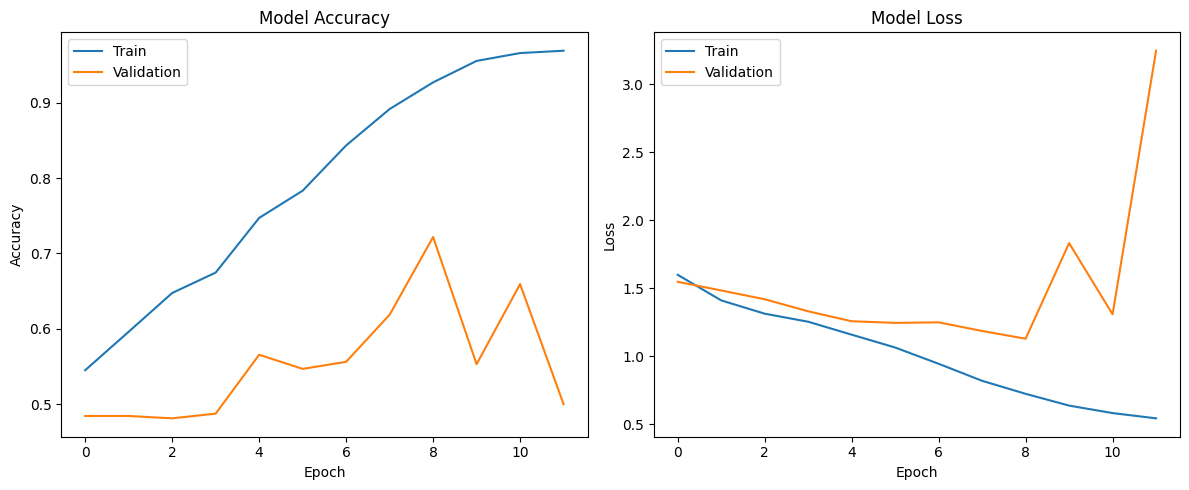

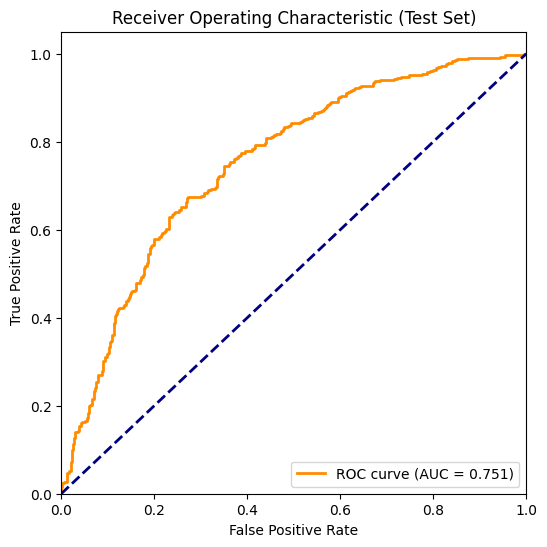

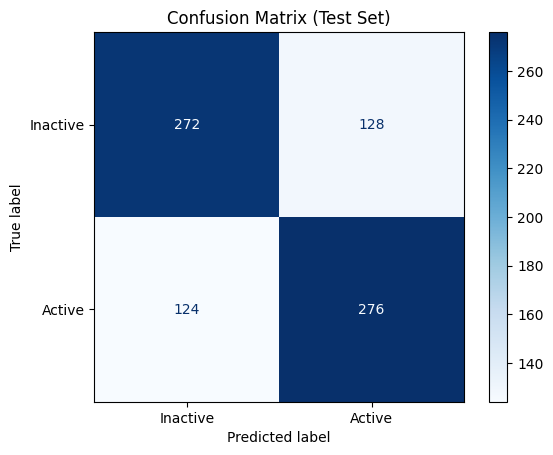

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# --- 1) Plot training curves (accuracy and loss) ---
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# --- 2) ROC Curve on Test ---
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Test Set)')
plt.legend(loc="lower right")
plt.show()

# --- 3) Confusion Matrix on Test ---
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Inactive','Active'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (Test Set)")
plt.show()


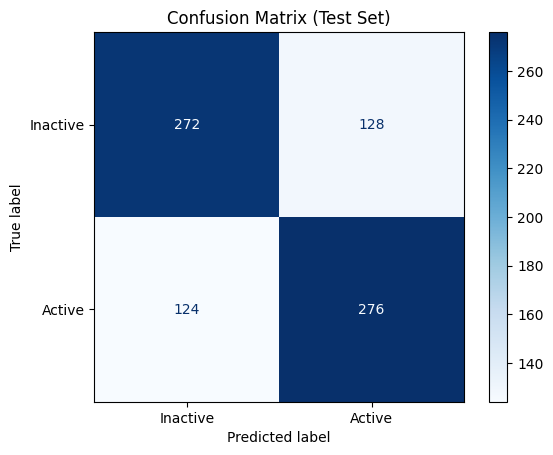

Confusion Matrix (raw counts):
[[272 128]
 [124 276]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Inactive', 'Active'])
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' = integer counts
plt.title("Confusion Matrix (Test Set)")
plt.show()

print("Confusion Matrix (raw counts):")
print(cm)


In [ ]:
from sklearn.metrics import classification_report

# Classification report
print("Classification Report (Test Set)")
print(classification_report(y_test, y_test_pred, target_names=['Inactive', 'Active']))


Classification Report (Test Set)
              precision    recall  f1-score   support

    Inactive       0.69      0.68      0.68       400
      Active       0.68      0.69      0.69       400

    accuracy                           0.69       800
   macro avg       0.69      0.69      0.68       800
weighted avg       0.69      0.69      0.68       800



# **Please ignore the below codes**

In [ ]:
import os, numpy as np, optuna, tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_auc_score, accuracy_score, f1_score,
                             cohen_kappa_score, precision_score, recall_score)

# --- Reproducibility (optional but helpful) ---
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(SEED)
np.random.seed(SEED)

# --- Load data ---
X = np.load('/content/drive/MyDrive/Datasets/AID_1239/X_images.npy')
y = np.load('/content/drive/MyDrive/Datasets/AID_1239/y_labels.npy')

# --- 1) Hold out TEST once (unseen by Optuna) ---
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=SEED
)

# --- 2) From TRAIN_FULL, create TRAIN / VAL for Optuna ---
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.20, stratify=y_train_full, random_state=SEED
)

def build_model(dense_units, l2_reg, dropout_rate, lr):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(128,128,3)),
        BatchNormalization(), MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        BatchNormalization(), MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        BatchNormalization(), MaxPooling2D(2,2),

        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(dense_units // 2, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# --- 3) Optuna objective: tune on TRAIN, score on VAL (no test leakage) ---
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True),
        "dropout_rate":  trial.suggest_float("dropout_rate", 0.2, 0.5),
        "l2":            trial.suggest_float("l2", 1e-5, 1e-2, log=True),
        "dense_units":   trial.suggest_int("dense_units", 64, 512, step=64),
        "batch_size":    trial.suggest_categorical("batch_size", [32, 64, 128]),
    }

    model = build_model(params["dense_units"], params["l2"], params["dropout_rate"], params["learning_rate"])
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, y_train,
              validation_data=(X_val, y_val),
              epochs=30, batch_size=params["batch_size"],
              callbacks=[es], verbose=0)

    y_val_prob = model.predict(X_val, verbose=0).ravel()
    return roc_auc_score(y_val, y_val_prob)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best AUC (val):", study.best_value)
print("Best Params:", study.best_params)

# --- 4) Retrain final model on TRAIN_FULL (train+val), eval once on TEST ---
best = study.best_params
final_model = build_model(best["dense_units"], best["l2"], best["dropout_rate"], best["learning_rate"])

es_final = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
final_model.fit(X_train_full, y_train_full,
                validation_split=0.10,  # internal val for early stopping (not test)
                epochs=30, batch_size=best["batch_size"],
                callbacks=[es_final], verbose=1)

# --- 5) Unified metrics on true TEST ---
y_test_prob = final_model.predict(X_test, verbose=0).ravel()
y_test_pred = (y_test_prob > 0.5).astype(int)

y_tr_prob = final_model.predict(X_train_full, verbose=0).ravel()
y_tr_pred = (y_tr_prob > 0.5).astype(int)

results = {
    "Train Accuracy": accuracy_score(y_train_full, y_tr_pred),
    "Test Accuracy":  accuracy_score(y_test, y_test_pred),
    "ROC-AUC":        roc_auc_score(y_test, y_test_prob),
    "F1-Score":       f1_score(y_test, y_test_pred),
    "Cohen's Kappa":  cohen_kappa_score(y_test, y_test_pred),
    "Precision":      precision_score(y_test, y_test_pred),
    "Recall":         recall_score(y_test, y_test_pred),
}
print("\n📊 Final Evaluation (True Test Set)")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


[I 2025-08-20 02:43:33,564] A new study created in memory with name: no-name-01a5a771-1eac-4349-8fe4-bbac25f28633
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-08-20 02:44:02,600] Trial 0 finished with value: 0.6348095703125 and parameters: {'learning_rate': 0.000656974330786893, 'dropout_rate': 0.3627178928619066, 'l2': 1.3069235890140987e-05, 'dense_units': 320, 'batch_size': 32}. Best is trial 0 with value: 0.6348095703125.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the mode

Best AUC (val): 0.81947265625
Best Params: {'learning_rate': 9.614514582112347e-05, 'dropout_rate': 0.4333442372721741, 'l2': 0.00467639231983756, 'dense_units': 384, 'batch_size': 64}
Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.5016 - loss: 6.0601 - val_accuracy: 0.4688 - val_loss: 5.2502
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5922 - loss: 5.1900 - val_accuracy: 0.4688 - val_loss: 5.0209
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6043 - loss: 4.8067 - val_accuracy: 0.4688 - val_loss: 4.8664
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6507 - loss: 4.4631 - val_accuracy: 0.4688 - val_loss: 4.5510
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6705 - loss: 4.1700 - val_accuracy: 0.4688 - val_loss: 4.2517
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6563 - loss: 3.9203 - val_accuracy: 0.4688 - val_loss: 3.9226
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - 

# **Please ignore the below codes**




In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np
import os

# Load preprocessed arrays
X = np.load('/content/drive/MyDrive/Datasets/AID_1239/X_images.npy')
y = np.load('/content/drive/MyDrive/Datasets/AID_1239/y_labels.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    # Hyperparameters to tune
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True)
    dropout_rate = trial.suggest_float("dropout_rate", 0.2, 0.5)
    l2_reg = trial.suggest_float("l2", 1e-5, 1e-2, log=True)
    dense_units = trial.suggest_int("dense_units", 64, 512, step=64)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])

    # Model definition
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),

        Dense(dense_units // 2, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(dropout_rate),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    early_stop = tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        validation_split=0.10,
                        epochs=30,
                        batch_size=batch_size,
                        callbacks=[early_stop],
                        verbose=0)

    y_pred_prob = model.predict(X_test).flatten()
    auc = roc_auc_score(y_test, y_pred_prob)
    return auc

# Run Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# Best results
print("Best AUC: ", study.best_value)
print("Best Params: ", study.best_params)


[I 2025-08-19 17:48:23,269] A new study created in memory with name: no-name-5392b76e-7f05-4529-829e-11799b068a14
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


[I 2025-08-19 17:48:55,028] Trial 0 finished with value: 0.5903294967276009 and parameters: {'learning_rate': 7.252755130765295e-05, 'dropout_rate': 0.2785639672814494, 'l2': 0.00026217722413903285, 'dense_units': 512, 'batch_size': 128}. Best is trial 0 with value: 0.5903294967276009.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:49:22,903] Trial 1 finished with value: 0.6852792196394091 and parameters: {'learning_rate': 0.0004748539770364517, 'dropout_rate': 0.2663760296685974, 'l2': 5.732316457801937e-05, 'dense_units': 384, 'batch_size': 32}. Best is trial 1 with value: 0.6852792196394091.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 17:49:44,149] Trial 2 finished with value: 0.615950751021841 and parameters: {'learning_rate': 0.0004038565005569074, 'dropout_rate': 0.2984210239894721, 'l2': 0.0041980647135010495, 'dense_units': 128, 'batch_size': 128}. Best is trial 1 with value: 0.6852792196394091.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:50:25,306] Trial 3 finished with value: 0.7778624087865793 and parameters: {'learning_rate': 0.00016317943229775811, 'dropout_rate': 0.4563663545965456, 'l2': 0.00034710525544838223, 'dense_units': 448, 'batch_size': 32}. Best is trial 3 with value: 0.7778624087865793.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:50:46,422] Trial 4 finished with value: 0.6076098949321699 and parameters: {'learning_rate': 1.2318404822036368e-05, 'dropout_rate': 0.49876752075993586, 'l2': 1.77411421344102e-05, 'dense_units': 512, 'batch_size': 128}. Best is trial 3 with value: 0.7778624087865793.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 17:51:02,184] Trial 5 finished with value: 0.5314764663105895 and parameters: {'learning_rate': 2.8519317345685757e-05, 'dropout_rate': 0.20877054267872144, 'l2': 0.009377560787908168, 'dense_units': 64, 'batch_size': 64}. Best is trial 3 with value: 0.7778624087865793.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:51:48,130] Trial 6 finished with value: 0.5773339351538403 and parameters: {'learning_rate': 0.0005613329103951037, 'dropout_rate': 0.39438432505721654, 'l2': 0.0003000957482146346, 'dense_units': 512, 'batch_size': 32}. Best is trial 3 with value: 0.7778624087865793.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


[I 2025-08-19 17:52:56,089] Trial 7 finished with value: 0.7913124702224228 and parameters: {'learning_rate': 9.391429603935286e-05, 'dropout_rate': 0.22471325822068128, 'l2': 0.007572265845196943, 'dense_units': 320, 'batch_size': 128}. Best is trial 7 with value: 0.7913124702224228.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 17:53:10,771] Trial 8 finished with value: 0.45898844003109407 and parameters: {'learning_rate': 0.0005489672479588291, 'dropout_rate': 0.40761448549995993, 'l2': 0.008331326198798186, 'dense_units': 64, 'batch_size': 64}. Best is trial 7 with value: 0.7913124702224228.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:53:48,004] Trial 9 finished with value: 0.8060445347175205 and parameters: {'learning_rate': 0.00017229617561750576, 'dropout_rate': 0.3932735470806431, 'l2': 0.0012275057038820354, 'dense_units': 256, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:54:15,962] Trial 10 finished with value: 0.7502507585445974 and parameters: {'learning_rate': 0.00018619619534251394, 'dropout_rate': 0.3506428396052548, 'l2': 0.002197572908485833, 'dense_units': 192, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 17:54:38,033] Trial 11 finished with value: 0.5510669776072619 and parameters: {'learning_rate': 5.489834089913224e-05, 'dropout_rate': 0.21779027196863607, 'l2': 0.0010566772522142879, 'dense_units': 256, 'batch_size': 128}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:55:09,100] Trial 12 finished with value: 0.7948544346648612 and parameters: {'learning_rate': 0.00017526527256003316, 'dropout_rate': 0.3429740405557235, 'l2': 0.0009228749500926248, 'dense_units': 320, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:55:39,318] Trial 13 finished with value: 0.7727469344767923 and parameters: {'learning_rate': 0.00021509025208044064, 'dropout_rate': 0.34076422640475645, 'l2': 0.0009875388182610386, 'dense_units': 256, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:56:10,414] Trial 14 finished with value: 0.7591401489505756 and parameters: {'learning_rate': 3.947987418666789e-05, 'dropout_rate': 0.3842802790787146, 'l2': 0.0007995232321569641, 'dense_units': 320, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:56:35,913] Trial 15 finished with value: 0.5338649414478799 and parameters: {'learning_rate': 0.0002910067474464155, 'dropout_rate': 0.4348162805478978, 'l2': 8.610041574425949e-05, 'dense_units': 192, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:57:09,403] Trial 16 finished with value: 0.5525715288748463 and parameters: {'learning_rate': 0.0009426642474274356, 'dropout_rate': 0.3415894497765109, 'l2': 0.0017780695995153078, 'dense_units': 384, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 17:57:26,406] Trial 17 finished with value: 0.556865768951077 and parameters: {'learning_rate': 0.0001330877795786362, 'dropout_rate': 0.3146858997051162, 'l2': 0.00012528694214642861, 'dense_units': 192, 'batch_size': 64}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:58:19,023] Trial 18 finished with value: 0.7710261039644926 and parameters: {'learning_rate': 1.977441512928458e-05, 'dropout_rate': 0.3631240372311737, 'l2': 0.002881333743738647, 'dense_units': 384, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:58:53,913] Trial 19 finished with value: 0.788485167632087 and parameters: {'learning_rate': 0.00010567047414943022, 'dropout_rate': 0.434104579268206, 'l2': 0.0005742854634345103, 'dense_units': 256, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 17:59:11,301] Trial 20 finished with value: 0.5044133503849144 and parameters: {'learning_rate': 0.00027835299777276913, 'dropout_rate': 0.4911325504161607, 'l2': 0.0001717558625016461, 'dense_units': 320, 'batch_size': 64}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:00:12,677] Trial 21 finished with value: 0.7903031670804181 and parameters: {'learning_rate': 7.893396228148908e-05, 'dropout_rate': 0.24254912586825988, 'l2': 0.004680908645375331, 'dense_units': 320, 'batch_size': 128}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:00:32,892] Trial 22 finished with value: 0.6099137390606585 and parameters: {'learning_rate': 0.00012520832164219435, 'dropout_rate': 0.311032142049674, 'l2': 0.0005675130493086773, 'dense_units': 320, 'batch_size': 128}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:01:37,141] Trial 23 finished with value: 0.784441686100454 and parameters: {'learning_rate': 5.752787319180409e-05, 'dropout_rate': 0.23793500238422166, 'l2': 0.0015339475693399386, 'dense_units': 384, 'batch_size': 128}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:02:31,579] Trial 24 finished with value: 0.7928326938990445 and parameters: {'learning_rate': 9.06140398729566e-05, 'dropout_rate': 0.37344437384576123, 'l2': 0.005090285404052674, 'dense_units': 256, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 18:03:07,410] Trial 25 finished with value: 0.7207584192181348 and parameters: {'learning_rate': 0.0002703988346095537, 'dropout_rate': 0.3712922871927397, 'l2': 0.0034455619449506153, 'dense_units': 128, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:03:48,844] Trial 26 finished with value: 0.7899646430452117 and parameters: {'learning_rate': 0.00015223944975073, 'dropout_rate': 0.4157765943008506, 'l2': 0.0018583839660235636, 'dense_units': 256, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 18:04:44,974] Trial 27 finished with value: 0.7852284410341283 and parameters: {'learning_rate': 4.2393807879069624e-05, 'dropout_rate': 0.3376396873982979, 'l2': 0.005667052501349302, 'dense_units': 192, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


[I 2025-08-19 18:05:31,781] Trial 28 finished with value: 0.7380576243135486 and parameters: {'learning_rate': 0.00022086624406942473, 'dropout_rate': 0.46556333280520174, 'l2': 0.0005307801878999879, 'dense_units': 448, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.
/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


[I 2025-08-19 18:05:57,162] Trial 29 finished with value: 0.7634218510995763 and parameters: {'learning_rate': 6.455111494342708e-05, 'dropout_rate': 0.2759739042425376, 'l2': 0.0012180834964609392, 'dense_units': 128, 'batch_size': 32}. Best is trial 9 with value: 0.8060445347175205.


Best AUC:  0.8060445347175205
Best Params:  {'learning_rate': 0.00017229617561750576, 'dropout_rate': 0.3932735470806431, 'l2': 0.0012275057038820354, 'dense_units': 256, 'batch_size': 32}


# Final Model Training Using Best Hyperparameters

In [ ]:
# Step 6: Retrain Best Model
best = study.best_params

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(best["dense_units"], activation='relu', kernel_regularizer=l2(best["l2"])),
    Dropout(best["dropout_rate"]),

    Dense(best["dense_units"] // 2, activation='relu', kernel_regularizer=l2(best["l2"])),
    Dropout(best["dropout_rate"]),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=best["learning_rate"]),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.10,
                    epochs=30, batch_size=best["batch_size"],
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                    verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5128 - loss: 2.3906 - val_accuracy: 0.4844 - val_loss: 1.5040
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5319 - loss: 1.4650 - val_accuracy: 0.4844 - val_loss: 1.4993
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5608 - loss: 1.3761 - val_accuracy: 0.5031 - val_loss: 1.3570
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5360 - loss: 1.3514 - val_accuracy: 0.5719 - val_loss: 1.2885
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5754 - loss: 1.2776 - val_accuracy: 0.6438 - val_loss: 1.2425
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6031 - loss: 1.2023 - val_accuracy: 0.6156 - val_loss: 1.1856
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6177 - loss: 1.1355 - val_accuracy: 0.5531 - val_loss: 1.1453
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6292 - loss: 1.0786 - val_accuracy: 0.6313 - v

In [ ]:
# Predict and Evaluate
y_pred_prob = model.predict(X_test).flatten()
y_pred_class = (y_pred_prob > 0.5).astype(int)

print("📊 Classification Report:")
print(classification_report(y_test, y_pred_class))

print("📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("🏅 Final ROC AUC:", roc_auc_score(y_test, y_pred_prob))


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       422
           1       0.70      0.70      0.70       378

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.72      0.71      0.72       800

📉 Confusion Matrix:
[[306 116]
 [112 266]]
🏅 Final ROC AUC: 0.7752419819955364


In [ ]:
#  Metrics on Train and Test ---
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score,
    cohen_kappa_score, precision_score, recall_score
)

y_train_prob = model.predict(X_train, verbose=0).flatten()
y_train_pred = (y_train_prob > 0.5).astype(int)

y_test_prob = model.predict(X_test, verbose=0).flatten()
y_test_pred = (y_test_prob > 0.5).astype(int)

results = {
    "Train Accuracy": accuracy_score(y_train, y_train_pred),
    "Test Accuracy": accuracy_score(y_test, y_test_pred),
    "ROC-AUC": roc_auc_score(y_test, y_test_prob),
    "F1-Score": f1_score(y_test, y_test_pred),
    "Cohen's Kappa": cohen_kappa_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred)
}

print("\n📊 Final Evaluation:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


📊 Final Evaluation:
Train Accuracy: 0.8791
Test Accuracy: 0.7150
ROC-AUC: 0.7752
F1-Score: 0.7000
Cohen's Kappa: 0.4286
Precision: 0.6963
Recall: 0.7037
